In [1]:
import numpy as np
import numpy.random as npr
from scipy import linalg as la
import matplotlib.pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance X: 
 [[ 1.0127954   0.91104571  2.93663651]
 [ 0.91104571  9.79898492 11.62107633]
 [ 2.93663651 11.62107633 17.49434935]] 

Eigenvalues:
 [ 2.62254742e+01+0.j -1.77099425e-16+0.j  2.08065544e+00+0.j] 

Eigenvectors:
 [[-0.1149871  -0.81649658  0.56578379]
 [-0.5779537  -0.40824829 -0.70661365]
 [-0.8079279   0.40824829  0.42495393]] 

U:
 [[-0.11499471  0.56578225 -0.81649658]
 [-0.57794419 -0.70662143 -0.40824829]
 [-0.80793362  0.42494306  0.40824829]] 

Spectrum:
 [1.61945669e+02 4.55914320e+01 6.59111070e-14] 

V transpose:
 [[ 3.17640456e-02 -2.86945610e-02  5.94623916e-02 ...  8.03121172e-03
  -2.74482290e-02 -4.07100117e-02]
 [ 2.16312314e-02 -8.74573604e-03 -1.68068252e-02 ... -1.64172657e-02
   2.21719539e-02  6.79270347e-03]
 [ 6.90712372e-01  7.17714329e-01  2.18612674e-03 ... -3.03035180e-05
  -2.05720546e-03  4.92297602e-03]
 ...
 [-6.76963400e-03  6.62605884e-03 -1.56891486e-02 ...  9.99674756e-01
   5.19046966e-04  4.59243319e-04]
 [ 2.26234149e-02 -1.9009401

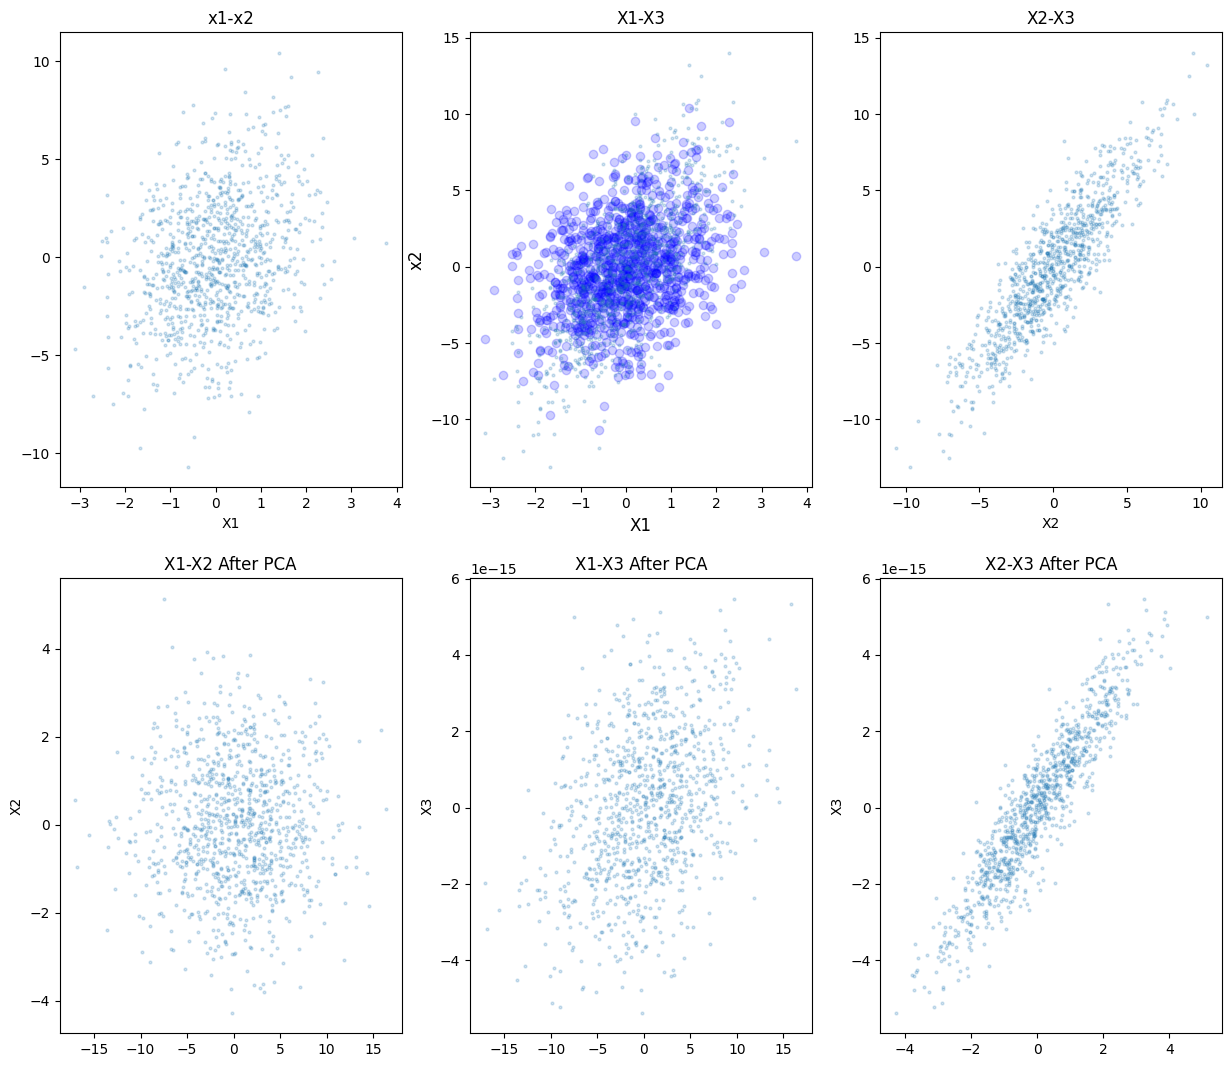

In [2]:
N = 1000

x1 = npr.normal(loc=0, scale=1, size=N)
x2 = x1 + npr.normal(loc=0, scale=3, size=N)

x3 = 2 * x1 + x2

X = [x1, x2, x3]

#getting the covariance of data
covariance = np.cov(X)
print("Covariance X: \n", covariance, '\n')

#finding the eigenvectors and eigenvalues
l, V = la.eig(covariance)
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

#finding the eigenvalues and the eigenvectors using the SVD
U, S, Vt = la.svd(X)
print("U:\n", U, '\n')
print("Spectrum:\n", S, '\n')
print("V transpose:\n", Vt, '\n')

# rotate all the data points accordingly to the new base
Xp = np.dot(U.T, X)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 13))
#X1-X2
axs[0, 1].scatter(X[0], X[1], alpha=0.2, color="b")
axs[0, 1].set_title("[x1,x2]", fontsize=20)
axs[0, 1].set_xlabel("x1", fontsize=12)
axs[0, 1].set_ylabel("x2", fontsize=12)

axs[0, 0].scatter(X[0], X[1], alpha=0.2, s=4)
axs[1, 0].scatter(Xp[0], Xp[1], alpha=0.2, s=4)
axs[0, 0].set_title("x1-x2")
axs[1, 0].set_title("X1-X2 After PCA")
axs[0, 0].set_xlabel("X1")
axs[1, 0].set_ylabel("X2")
axs[0, 0].set_xlabel("X1")
axs[1, 0].set_ylabel("X2")

#X1-X3
axs[0, 1].scatter(X[0], X[2], alpha=0.2, s=4)
axs[1, 1].scatter(Xp[0], Xp[2], alpha=0.2, s=4)
axs[0, 1].set_title("X1-X3")
axs[1, 1].set_title("X1-X3 After PCA")
axs[0, 1].set_xlabel("X1")
axs[1, 1].set_ylabel("X3")
axs[0, 1].set_xlabel("X1")
axs[1, 1].set_ylabel("X3")
#X2-X3
axs[0, 2].scatter(X[1], X[2], alpha=0.2, s=4)
axs[1, 2].scatter(Xp[1], Xp[2], alpha=0.2, s=4)
axs[0, 2].set_title("X2-X3")
axs[1, 2].set_title("X2-X3 After PCA")
axs[0, 2].set_xlabel("X2")
axs[1, 2].set_ylabel("X3")
axs[0, 2].set_xlabel("X2")
axs[1, 2].set_ylabel("X3")

plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Covariance matrix:
 [[ 1.01463135  0.91314007  2.94023076]
 [ 0.91314007  9.82118069 11.62766487]
 [ 2.94023076 11.62766487 17.5082862 ]] 

Eigenvalues:
 [2.62491105e+01 4.03598042e-03 2.09095178e+00] 

Eigenvectors:
 [[-0.11504097 -0.81789288  0.56375244]
 [-0.57814327 -0.40637042 -0.70754042]
 [-0.80778459  0.40732581  0.42611001]] 


With SVD:
Eigenvalues:
 [2.62760284e+01 2.09096869e+00 4.05511668e-03]
Eigenvectors:
 [[-0.11503434  0.56374218 -0.81790088]
 [-0.57811241 -0.70756005 -0.40638013]
 [-0.80780761  0.42609098  0.40730006]]


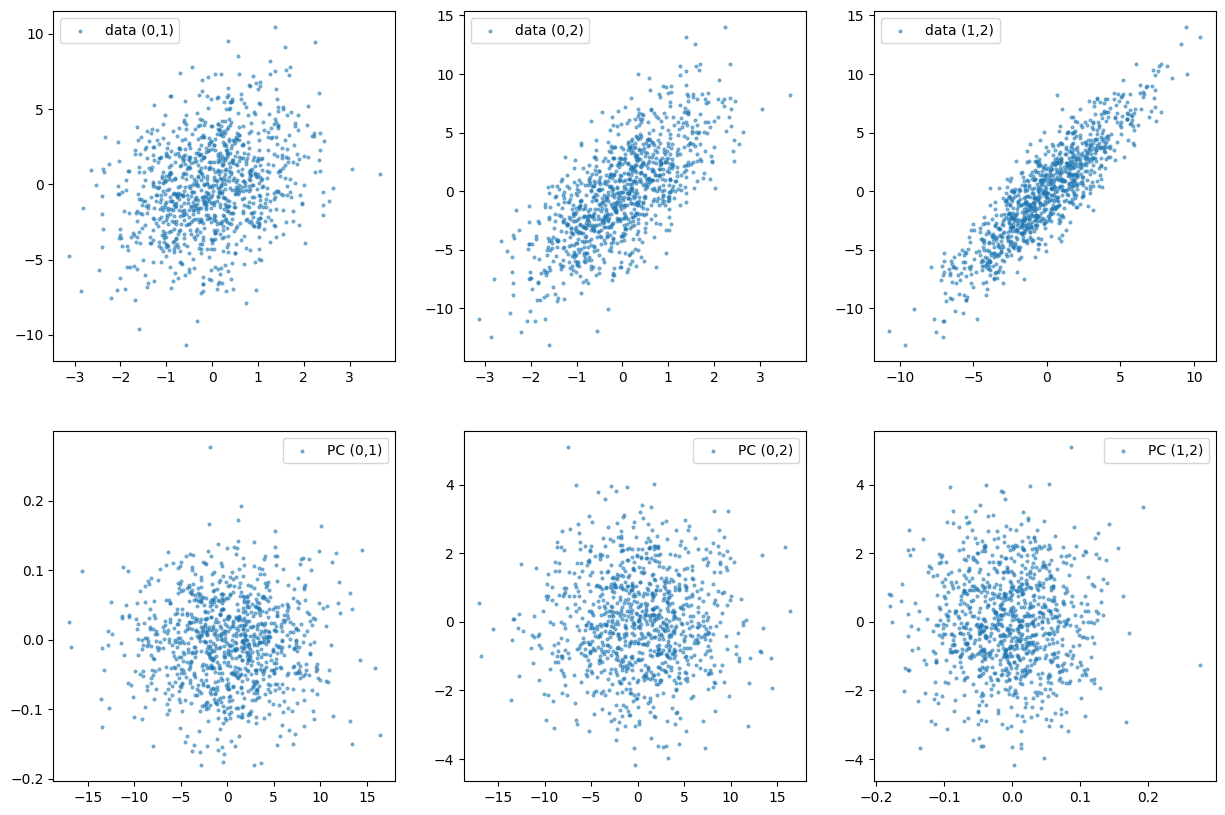

In [3]:
#giving variables
noises = np.random.normal(loc=0, scale=1 / 50, size=(3, N, 10))
x_noise = X + np.sum(noises, axis=2)

#Reducind dimension using PCA
#the covariance matrix
cov1 = np.cov(x_noise)
print("Covariance matrix:\n", cov1, '\n')
l1, V1 = la.eig(cov1)
l1 = np.real_if_close(l1)

U1, s1, Vt1 = la.svd(x_noise)
l_svd1 = s1 ** 2 / (N - 1)
V_svd1 = U1

print("Eigenvalues:\n", l1, '\n')
print("Eigenvectors:\n", V1, '\n')
print('\nWith SVD:\nEigenvalues:\n', l_svd1)
print('Eigenvectors:\n', V_svd1)

# plotting
Xp1 = np.dot(V1.T, x_noise)
_, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs[0, 0].scatter(x_noise[0, :], x_noise[1, :], alpha=0.5, label='data (0,1)', s=4)
axs[0, 0].legend()
axs[0, 1].scatter(x_noise[0, :], x_noise[2, :], alpha=0.5, label='data (0,2)', s=4)
axs[0, 1].legend()
axs[0, 2].scatter(x_noise[1, :], x_noise[2, :], alpha=0.5, label='data (1,2)', s=4)
axs[0, 2].legend()
axs[1, 0].scatter(Xp1[0, :], Xp1[1, :], alpha=0.5, s=4, label='PC (0,1)')
axs[1, 0].legend()
axs[1, 1].scatter(Xp1[0, :], Xp1[2, :], alpha=0.5, s=4, label='PC (0,2)')
axs[1, 1].legend()
axs[1, 2].scatter(Xp1[1, :], Xp1[2, :], alpha=0.5, s=4, label='PC (1,2)')
axs[1, 2].legend()

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [150]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/